# Hypothesis Testing
For our hypothesis test, we will be using <BLANK>

# Research Questions
1. Is there a significant difference in average household income between urban and rural areas in the Philippines?

2. Does the cost of living affect the income disparity between urban and rural areas?


In [96]:
import re
import pandas as pd
import scipy
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

def convert_google_sheet_url(url):
    # Regular expression to match and capture the necessary part of the URL
    pattern = r'https://docs\.google\.com/spreadsheets/d/([a-zA-Z0-9-_]+)(/edit#gid=(\d+)|/edit.*)?'

    # Replace function to construct the new URL for CSV export
    # If gid is present in the URL, it includes it in the export URL, otherwise, it's omitted
    replacement = lambda m: f'https://docs.google.com/spreadsheets/d/{m.group(1)}/export?' + (f'gid={m.group(3)}&' if m.group(3) else '') + 'format=csv'

    # Replace using regex
    new_url = re.sub(pattern, replacement, url)

    return new_url

# Preprocessing
We will stich together the multiple sheets into one mastersheet so that we can properly do some magic. Below are some functions used to effectively preprocess the data.

To easily separate them, we add a new column called 'YEAR' which contains which year in which the FIES was collected

In [9]:
dataset_url = 'https://docs.google.com/spreadsheets/d/1WvPYjCbY-jXhDB_-R0UMtUXj_fmhGbsM/edit'
dataset_sheets = [
    (1991, 'https://docs.google.com/spreadsheets/d/1WvPYjCbY-jXhDB_-R0UMtUXj_fmhGbsM/edit#gid=103037532'),
    (1994, 'https://docs.google.com/spreadsheets/d/1WvPYjCbY-jXhDB_-R0UMtUXj_fmhGbsM/edit#gid=2100587492'),
    (1997, 'https://docs.google.com/spreadsheets/d/1WvPYjCbY-jXhDB_-R0UMtUXj_fmhGbsM/edit#gid=172281918'),
    (2000, 'https://docs.google.com/spreadsheets/d/1WvPYjCbY-jXhDB_-R0UMtUXj_fmhGbsM/edit#gid=1648603626'),
    (2003, 'https://docs.google.com/spreadsheets/d/1WvPYjCbY-jXhDB_-R0UMtUXj_fmhGbsM/edit#gid=308318816'),
    (2006, 'https://docs.google.com/spreadsheets/d/1WvPYjCbY-jXhDB_-R0UMtUXj_fmhGbsM/edit#gid=284607147'),
    (2009, 'https://docs.google.com/spreadsheets/d/1WvPYjCbY-jXhDB_-R0UMtUXj_fmhGbsM/edit#gid=457620696'),
    (2012, 'https://docs.google.com/spreadsheets/d/1WvPYjCbY-jXhDB_-R0UMtUXj_fmhGbsM/edit#gid=2124514616'),
    (2015, 'https://docs.google.com/spreadsheets/d/1WvPYjCbY-jXhDB_-R0UMtUXj_fmhGbsM/edit#gid=174256795'),
    (2018, 'https://docs.google.com/spreadsheets/d/1WvPYjCbY-jXhDB_-R0UMtUXj_fmhGbsM/edit#gid=1844728002'),
]

sheets = []

# TODO - Standardize this 
for year, sheet in dataset_sheets:
    print(year, end='\r')
    proper_url = convert_google_sheet_url(sheet)
    gsheet = pd.read_csv(proper_url, low_memory=False)
    gsheet.insert(0, 'YEAR', year)
    print('complete')
    sheets.append(gsheet)

dataset = pd.concat(sheets)

complete
complete
complete
complete
complete
complete
complete
complete
complete
complete


In [56]:
dataset['TOINC'] = pd.to_numeric(dataset['TOINC'], errors='coerce')
dataset['YEAR'] = pd.to_numeric(dataset['YEAR'], errors='coerce')
dataset['URB'] = pd.to_numeric(dataset['URB'], errors='coerce')

fixed_dataset = dataset.dropna(axis='rows').astype({'YEAR': 'int', 'URB':int})
fixed_dataset

,YEAR,REGN,URB,TOINC
0,1991,0,1,42153.0
1,1991,0,1,26938.0
2,1991,0,1,84773.0
3,1991,0,1,56075.0
4,1991,0,1,45658.0
...,...,...,...,...
147712,2018,17,2,382676.0
147713,2018,17,2,184325.0
147714,2018,17,2,900861.0
147715,2018,17,2,65255.0


# Research Question 1
> Is there a significant difference in average household income between urban and rural areas in the Philippines?

To test our hypothesis, we decided to use a 1-sample t-test for our hypothesis test. We used two variables, Urbanity and Total Income for this

In [28]:
import scipy.stats


a = fixed_dataset.loc[:, 'TOINC']
b = fixed_dataset.loc[:, 'URB']

scipy.stats.ttest_ind(a,b)

TtestResult(statistic=421.8469444719112, pvalue=0.0, df=870070.0)

Based from the above test, there seems to be a relationship between urbanity and the total income between the regions

# Research Question 2
> Does the cost of living affect the income disparity between urban and rural areas?

Income disparity is measured by the Gini index of a country. 

Unfortunately, the dataset for the CPI is in another sheet. We'll be loading that shortly soon enough 

In [29]:
CPI_dset = pd.read_csv('./[CS 132] WFY Autumn - Dataset - Consumer Price Index.csv', low_memory=False, on_bad_lines='skip')
CPI_dset

,Year,Consumer Price Index,Inflation: Consumer Price Index,Wholesale Price Index,Inflation: GDP Deflator,Inflation: GDP Deflator: Linked Series,(DC)Consumer Price Index,(DC)Wholesale Price Index
0,1960,1.13,4.15,0.86,NaN,NaN,1.57,NaN
1,1961,1.15,1.60,0.91,3.12,NaN,1.59,NaN
2,1962,1.21,5.80,0.96,6.73,NaN,1.68,NaN
3,1963,1.28,5.63,1.05,8.91,NaN,1.78,NaN
4,1964,1.39,8.18,1.09,4.58,NaN,1.92,NaN
...,...,...,...,...,...,...,...,...
58,2018,126.59,5.31,123.29,3.74,3.74,NaN,NaN
59,2019,129.62,2.39,125.31,0.70,0.70,NaN,NaN
60,2020,132.72,2.39,128.32,1.65,1.65,NaN,NaN
61,2021,137.94,3.93,132.25,2.28,2.28,NaN,NaN


We compute the average rural income and the average urban income as shown below

In [108]:
average_income = fixed_dataset.groupby(['YEAR', 'URB'], as_index=False)['TOINC'].mean()
average_income_urban = average_income.iloc[::2]  # even
average_income_rural = average_income.iloc[1::2] # odd 

#average_income
average_income_urban

,YEAR,URB,TOINC
0,1991,1,92958.037239
2,1994,1,123823.472829
4,1997,1,158172.017330
6,2000,1,182082.979213
8,2006,1,231060.874269
10,2009,1,268843.801615
12,2012,1,296253.094842
14,2015,1,338080.255732
16,2018,1,371250.938945


Let's first graph this to see any disparities in between

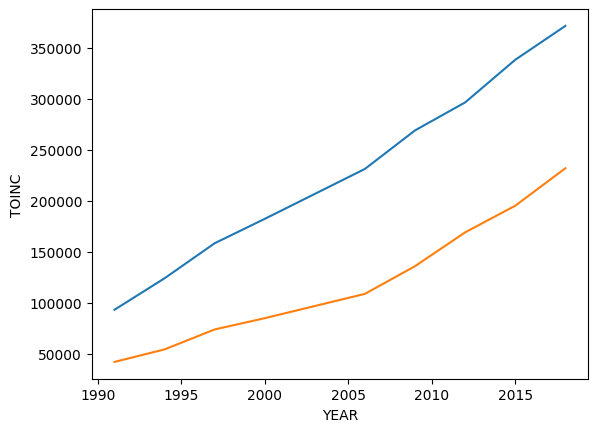

In [109]:
sns.lineplot(average_income_urban, x='YEAR', y='TOINC')
sns.lineplot(average_income_rural, x='YEAR', y='TOINC')
plt.show()

We get the disparity by taking the difference between the two (urban - rural)

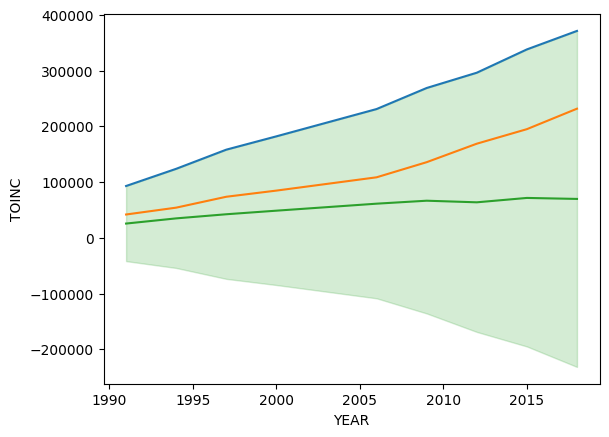

In [126]:
average_income['DISPARITY'] = average_income_urban['TOINC'].sub(average_income_rural['TOINC'], fill_value=0)

sns.lineplot(average_income_urban, x='YEAR', y='TOINC')
sns.lineplot(average_income_rural, x='YEAR', y='TOINC')
sns.lineplot(average_income, x='YEAR', y='DISPARITY')
plt.show()

From this, we filter out the CPI dataset with only the years found in the average income dataset

<Axes: xlabel='Year', ylabel='Consumer Price Index'>

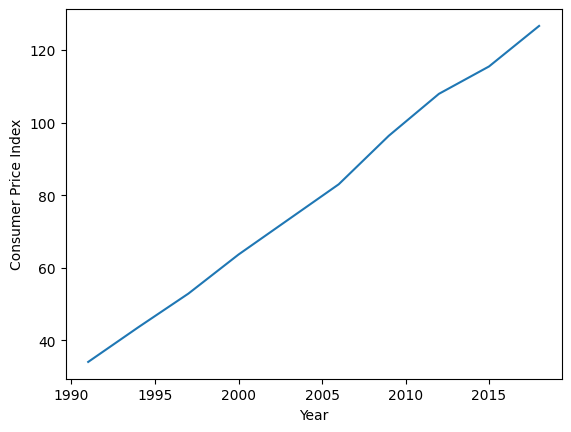

In [136]:
f = CPI_dset.filter(items=['Year', 'Consumer Price Index'])
filtered = f.loc[f['Year'].isin(average_income['YEAR'])]

sns.lineplot(filtered, x='Year', y='Consumer Price Index')

Now that we have preprocessed our CPI data to oblivion. We can perform the hypothesis test

In [139]:
filtered.merge(average_income, how='right', on='YEAR')

KeyError: 'YEAR'